In [1]:
#%matplotlib notebook
#%matplotlib inline
#matplotlib.interactive(True)
%gui qt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib import rcParams
import matplotlib.animation as animation
from matplotlib.widgets import Slider
import sys
import scipy
from IPython.display import HTML
import pandas as pd
import numpy as np
import math
import cmath
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
import json
import ipyvolume as ipv
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits  # We use fits to open the actual data file
from random import uniform, shuffle, randint
from pyquaternion import Quaternion
from scipy import stats
import csv
from itertools import dropwhile, takewhile
import os
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sklearn.cluster
from scipy.signal import savgol_filter
import skimage
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Computer Modern']
sys.path.append("/lib/python2.7/site-packages/")
import scipy.stats as stats 
from matplotlib import ticker
import matplotlib.patches as mpatches
import scipy.ndimage as ndimage
import pickle
import scipy.signal
import string


/home/simon/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/simon/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/simon/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/simon/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/simon/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Ru

/home/simon/anaconda2/lib/python2.7/site-packages/pywt/_swt.py:1: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._extensions._swt import swt_max_level, swt as _swt, swt_axis as _swt_axis
/home/simon/anaconda2/lib/python2.7/site-packages/skimage/restoration/non_local_means.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._nl_means_denoising import (
/home/simon/anaconda2/lib/python2.7/site-packages/skimage/measure/_marching_cubes_lewiner.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _marching_cubes_lewiner_cy
/home/simon/anaconda2/lib/python2.7/site-packages/skimage/measure/_marching_cubes_classic.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _marching_cubes_classic_cy
/home/simon/anaconda2/lib/python2.7/site-package

3
600
16


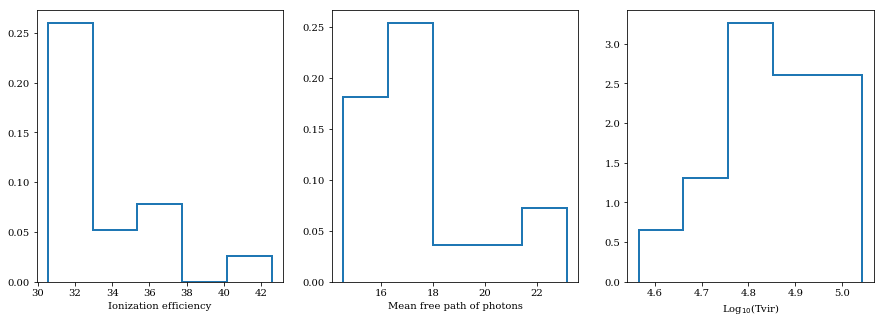

In [17]:
np.seterr(invalid='ignore', divide='ignore')
from decimal import *

FOURPLACES = Decimal(10) ** -4       # same as Decimal('0.0001')
SIXPLACES = Decimal(10) ** -6       # same as Decimal('0.0001')

#import cosmolopy.constants as cc

#def main():
if __name__ == '__main__':

# Script to read in all the data and separate out the MCMC walkers into initial conditions, burn-in and actual data
# This script only reads all the data and all associated quantities together into memory.
# Can modify this script to do whatever you choose

#### NOTE ###
# This only works on the actual MCMC data (i.e. not the burn-in data).

# 1) Must manually provide the total number of redshifts used by 21CMMC.py (i.e. the sum total of Redshift and Redshifts_For_Prior if the co-eval option is set). 
#If the light-cone option is set, must provide the total number of redshifts (number of redshifts in the AveData_* textfile)

    n_redshifts = 4

# 2) Must manually provide the number of sample iterations and the walkers ratio chosen in 21CMMC.py

    walkers_ratio = 2
    sample_iterations = 100

# 3) Provide the directory name for the stored data (21CMMC.py will create the directory with a timestamp)
    KeepDataString = 'KEEP_MCMC_DATA_Fri_16_Aug_2019_10h_17m_42s'

    Stored_AveData = 'AveData'
    Stored_TauData = 'TauData'
    Stored_PSData = 'StatisticalData'

    # Provide the remaining string to fill the file name (it'll read in all data, burnin and the actual data)
    # Switch the file name to include the directory if that is preferred
    FileNames = 'ReionModel_DCT_HERA331_Co-eval_multiz'

    # First the burn-in. It'll need the burn-in data to determine the accepted/rejected points of the actual MCMC data (i.e not the burn-in data)

    f = open('%sburnin.out'%(FileNames),'r')
    parameters_burnin = [[float(v) for v in line.rstrip('\n').split('\t')] for line in f.readlines()]
    f.close()

    f2 = open('%sburninprob.out'%(FileNames),'r')
    probs_burnin = [float(v) for v in f2.readlines()]
    f2.close()

    f3 = open('%sNFvalsburnin.out'%(FileNames),'r')
    NFvals_Burnin = [[float(v) for v in line.rstrip('\n').split('\t')] for line in f3.readlines()]
    f3.close()


    # Now the MCMC data

    f = open('%s.out'%(FileNames),'r')
    parameters = [[float(v) for v in line.rstrip('\n').split('\t')] for line in f.readlines()]
    f.close()
    
    f2 = open('%sprob.out'%(FileNames),'r')
    probs = [float(v) for v in f2.readlines()]
    f2.close()

    f3 = open('%sNFvals.out'%(FileNames),'r')
    NFvals = [[float(v) for v in line.rstrip('\n').split('\t')] for line in f3.readlines()]
    f3.close()
    

    # Number of total iterations for the burn-in and main MCMC. Useful for lengths of lists/arrays
    nsamples_burnin = len(probs_burnin)
    nsamples = len(probs)-16

    # Total number of sampled astrophysical/cosmological parameters
    n_parameters = len(parameters[0])
    print n_parameters
    # Total number of iterations
    n_iterations = len(parameters)
    print n_iterations
    # Total number of walkers
    n_walkers = walkers_ratio*n_parameters
    
    # Rudimentary check to determine if the inputs match the expected amount of data
    if walkers_ratio*n_parameters*sample_iterations != n_iterations:
        print 'ERROR: The inputs (walkers_ratio, sample_iterations) have not been added correctly. Make sure these numbers are correct'


    # Read in the file names of all the walker files. These aren't needed, but could come in use depending on the application
    path = '%s/WalkerData'%(KeepDataString)

    WalkerFileNames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and 'Cosmology' not in f]
    WalkerFileNames_Cosmology = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and 'Cosmology' in f]



    # Set up a list to store True/False data which denotes whether the corresponding walker (sampled parameter set) was accepted/rejected
    LikelihoodCheck = []
    

    burnin_iterations = len(parameters_burnin)/n_walkers

    # A counter, which will be used to store the total number of accepted positions
    total_true = 0


    # This first loop checks whether the first positions in the main MCMC are new, relative to the final position of the burn-in data
    for ii in range(n_walkers):
        if parameters_burnin[ii+(burnin_iterations-1)*n_walkers] == parameters[ii]:
        # New proposed position was rejected
            LikelihoodCheck.append(False)
        else:
        # New proposed position was accepted
            LikelihoodCheck.append(True)

            total_true += 1

            
    # Now go through the entire main MCMC data and determine the positions accepted/rejected
    for i in range(sample_iterations-1):
        for ii in range(n_walkers):

            if parameters[ii+i*n_walkers] == parameters[ii+(i+1)*n_walkers]:
                LikelihoodCheck.append(False)
                # New proposed position was rejected
            else:
                LikelihoodCheck.append(True)
                # New proposed position was accepted

                total_true += 1



    separator = "_"
    seq = []
    # Add the random thread ID
    seq.append("%s"%(Decimal(repr(NFvals[0][n_redshifts])).quantize(SIXPLACES)))
    # Add the second ID
    seq.append("%s"%(Decimal(repr(NFvals[0][n_redshifts+1])).quantize(SIXPLACES)))

    StringArgument = string.join(seq,separator)





    # Read the k-values from the sampled PS. This remains constant for all redshifts and parameter samplings.
    AllData_kvals = np.loadtxt('%s/%s/TotalPSData_%s.txt'%(KeepDataString,Stored_PSData,StringArgument), usecols=(0,))



    # Create the arrays to contain all the data from the accepted points
    AllData_PSvals = np.zeros((total_true,n_redshifts,len(AllData_kvals)))

    AllData_zvals = np.zeros(n_redshifts)
    AllData_xHvals = np.zeros((total_true,n_redshifts))
    AllData_Tbvals = np.zeros((total_true,n_redshifts))
    AllData_TauVals = np.zeros(total_true)
    All_fstar = np.zeros(total_true)
    All_alphastar = np.zeros(total_true)
    All_fesc = np.zeros(total_true)
    All_alphaesc = np.zeros(total_true)
    All_mturn = np.zeros(total_true)

    fid = [-1.04, 0.5,-1.3,-0.5,8.69]
    AllData_zvals = np.loadtxt('%s/%s/AveData_%s.txt'%(KeepDataString,Stored_AveData,StringArgument), usecols=(0,))


    index_true = 0

    for i in range(nsamples):
    
        if LikelihoodCheck[i] is True:
                        # This astrophysical/cosmological parameter set has been accepted by the MCMC sampler. Read in and store the data in memory

            # Create the file_ending, which is specific to each individual MCMC walker
            seq = []
            # Add the random thread ID
            seq.append("%s"%(Decimal(repr(NFvals[i][n_redshifts])).quantize(SIXPLACES)))
            # Add the second ID
            seq.append("%s"%(Decimal(repr(NFvals[i][n_redshifts+1])).quantize(SIXPLACES)))

            StringArgument = string.join(seq,separator)

            # Read in all the power spectrum data (all k and PS)
            for j in range(n_redshifts):

                AllData_PSvals[index_true][j] = np.loadtxt('%s/%s/TotalPSData_%s.txt'%(KeepDataString,Stored_PSData,StringArgument), usecols=(j+1,))
            
            # Read in all the global data
            All_fstar[index_true] =  np.loadtxt('%s/WalkerData/Walker_%s.txt'%(KeepDataString,StringArgument), usecols=(1,))[7]
            All_alphastar[index_true] =  np.loadtxt('%s/WalkerData/Walker_%s.txt'%(KeepDataString,StringArgument), usecols=(1,))[8]
            All_fesc[index_true] =  np.loadtxt('%s/WalkerData/Walker_%s.txt'%(KeepDataString,StringArgument), usecols=(1,))[9]
            All_alphaesc[index_true] =  np.loadtxt('%s/WalkerData/Walker_%s.txt'%(KeepDataString,StringArgument), usecols=(1,))[4]
            All_mturn[index_true] =  np.loadtxt('%s/WalkerData/Walker_%s.txt'%(KeepDataString,StringArgument), usecols=(1,))[5]

    
    
    # Read in the IGM neutral fraction
            AllData_xHvals[index_true] = np.loadtxt('%s/%s/AveData_%s.txt'%(KeepDataString,Stored_AveData,StringArgument), usecols=(1,))

            # Read in the average brightness temperature contrast
            AllData_Tbvals[index_true] = np.loadtxt('%s/%s/AveData_%s.txt'%(KeepDataString,Stored_AveData,StringArgument), usecols=(2,))
            
            # Read in the electron scattering optical depth, \tau
            AllData_TauVals[index_true] = np.loadtxt('%s/%s/Tau_e_%s.txt'%(KeepDataString,Stored_TauData,StringArgument), usecols=(0,))
            index_true += 1
print index_true
mockobs_k_values = np.loadtxt('../../Zeus/test_200Mpc/delTps_estimate_1.000000_1.000000_8.610322.txt', usecols=(0,))
mockobs_PS_values = np.loadtxt('../../Zeus/test_200Mpc/delTps_estimate_1.000000_1.000000_8.610322.txt', usecols=(1,))
Error_k_values = np.loadtxt('NoiseData/EOS_FaintGalaxies/Co-Eval/TotalError_HERA331_PS_200Mpc_z6.429094_EOS_FaintGalaxies_1000hr.txt', usecols=(0,))
Error_PS_values = np.loadtxt('NoiseData/EOS_FaintGalaxies/Co-Eval/TotalError_HERA331_PS_200Mpc_z6.429094_EOS_FaintGalaxies_1000hr.txt', usecols=(1,))
#f1 = interp1d(mockobs_k_values, mockobs_PS_values, fill_value = "extrapolate")
#f2 = interp1d(Error_k_values, Error_PS_values, fill_value = "extrapolate")

#ax = plt.subplot(1, 1, 1)
#plt.plot(AllData_kvals,f1(AllData_kvals))
#ax.fill_between(AllData_kvals, f1(AllData_kvals) + f2(AllData_kvals)/10, \
#                    f1(AllData_kvals), alpha=0.2, facecolor='b', interpolate=True)
#ax.fill_between(AllData_kvals, f1(AllData_kvals) -  f2(AllData_kvals)/10, \
#                    f1(AllData_kvals), alpha=0.2,facecolor='b', interpolate=True)
#for i in range(100):
    #if LikelihoodCheck[i] is True:
    #    plt.plot(AllData_kvals,AllData_PSvals[i][3])

#plt.xlim(0.1,1)
#plt.ylim(0,2)
figure = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1)
plt.hist(All_fstar[:-1],lw=2, histtype='step', normed=True, bins=5)
plt.xlabel('Ionization efficiency')
ax = plt.subplot(1, 3, 2)

plt.hist(All_alphastar[:-1],lw=2, histtype='step', normed=True, bins=5)
plt.xlabel('Mean free path of photons')

ax = plt.subplot(1, 3, 3)
plt.hist(All_fesc[:-1],lw=2, histtype='step', normed=True, bins=5)
plt.xlabel(r'Log$_{10}$(Tvir)')
plt.savefig('first_test_100samples_3params.pdf', bbox_inches='tight')
#plt.hist(All_alphaesc,lw=2, histtype='step', normed=True, bins=30)

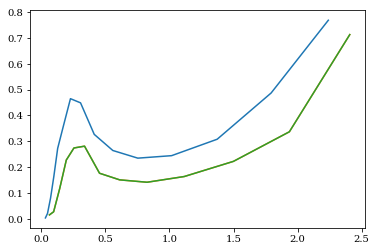

In [98]:
mockobs_k_values = np.loadtxt('../../Zeus/test_200Mpc/delTps_estimate_1.000000_1.000000_6.429094.txt', usecols=(0,))
mockobs_PS_values = np.loadtxt('../../Zeus/test_200Mpc/delTps_estimate_1.000000_1.000000_6.429094.txt', usecols=(1,))
plt.plot(mockobs_k_values,mockobs_PS_values)
mockobs_k_values = np.loadtxt('../../Zeus/test_100Mpc/delTps_estimate_1.000000_1.000000_6.429094.txt', usecols=(0,))
mockobs_PS_values = np.loadtxt('../../Zeus/test_100Mpc/delTps_estimate_1.000000_1.000000_6.429094.txt', usecols=(1,))
plt.plot(mockobs_k_values,mockobs_PS_values)
#mockobs_k_values = np.loadtxt('MockObs/EOS_FaintGalaxies/Co-Eval/MockObs_PS_200Mpc_EOS_FaintGalaxies_z6.429094.txt', usecols=(0,))
#mockobs_PS_values = np.loadtxt('MockObs/EOS_FaintGalaxies/Co-Eval/MockObs_PS_200Mpc_EOS_FaintGalaxies_z6.429094.txt', usecols=(1,))
plt.plot(mockobs_k_values,mockobs_PS_values)


[33.37619281  4.85526644 17.29931438]


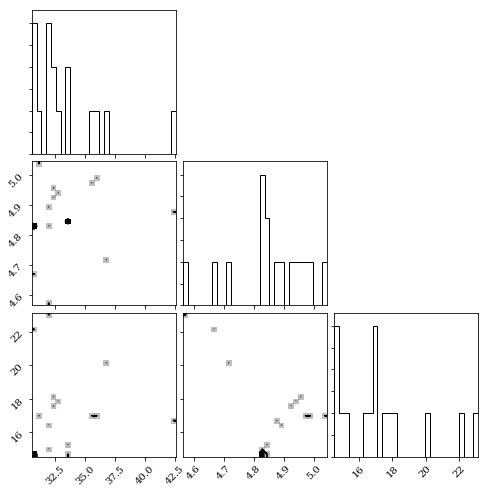

In [16]:
import corner

D = np.asarray(zip(All_fstar[:-1], All_fesc[:-1], All_alphastar[:-1]))
print np.mean(D,0)
fig = corner.corner(D,bins=30)

#plt.plot(np.histogram2d(All_fstar, All_fesc)[1],np.histogram2d(All_fstar, All_fesc)[0] )
#H, xedges, yedges = np.histogram2d(All_fstar, All_fesc, bins=(xedges, yedges))